# Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data

In [11]:
df_train = pd.read_csv('train.csv')
df_train.drop(['Id'], axis=1, inplace=True)
df_test = pd.read_csv('test.csv')
df_test.drop(['Id'], axis=1, inplace=True)

In [12]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Handling Missing Values from Training Data

<Axes: >

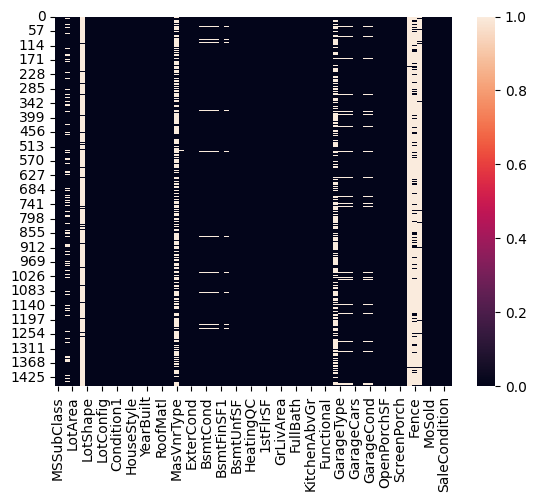

In [14]:
sns.heatmap(df_train.isnull())

In [15]:
missing_value = df_train.isnull().sum().sort_values(ascending=False)
missing_value[missing_value > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [30]:
# Remove columns with more than 500 missing values
df_cleaned = df_train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)

# Select Numerical Data
fillWithNumber = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
for col in fillWithNumber:
    df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)

# Select Categorical Data
fillWithType = ['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']
for col in fillWithType:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

C:\Users\daksh\AppData\Local\Temp\ipykernel_34752\3269840608.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)
C:\Users\daksh\AppData\Local\Temp\ipykernel_34752\3269840608.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

<Axes: >

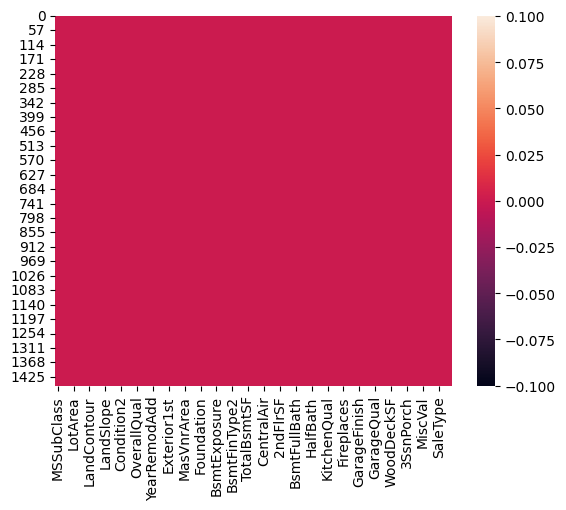

In [23]:
sns.heatmap(df_cleaned.isnull())

In [31]:
df_cleaned.isnull().sum().sum()

0

In [32]:
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Exploratory Data Analysis

Text(0.5, 0, 'SalePrice')

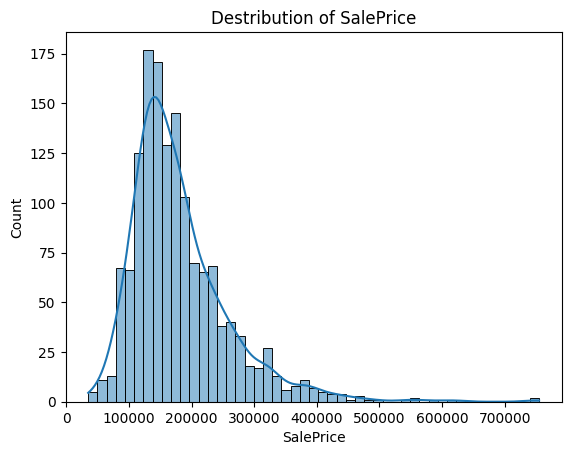

In [26]:
sns.histplot(df_cleaned, x='SalePrice', kde=True)    
    
plt.title(f'Destribution of SalePrice')
plt.xlabel(f'SalePrice')

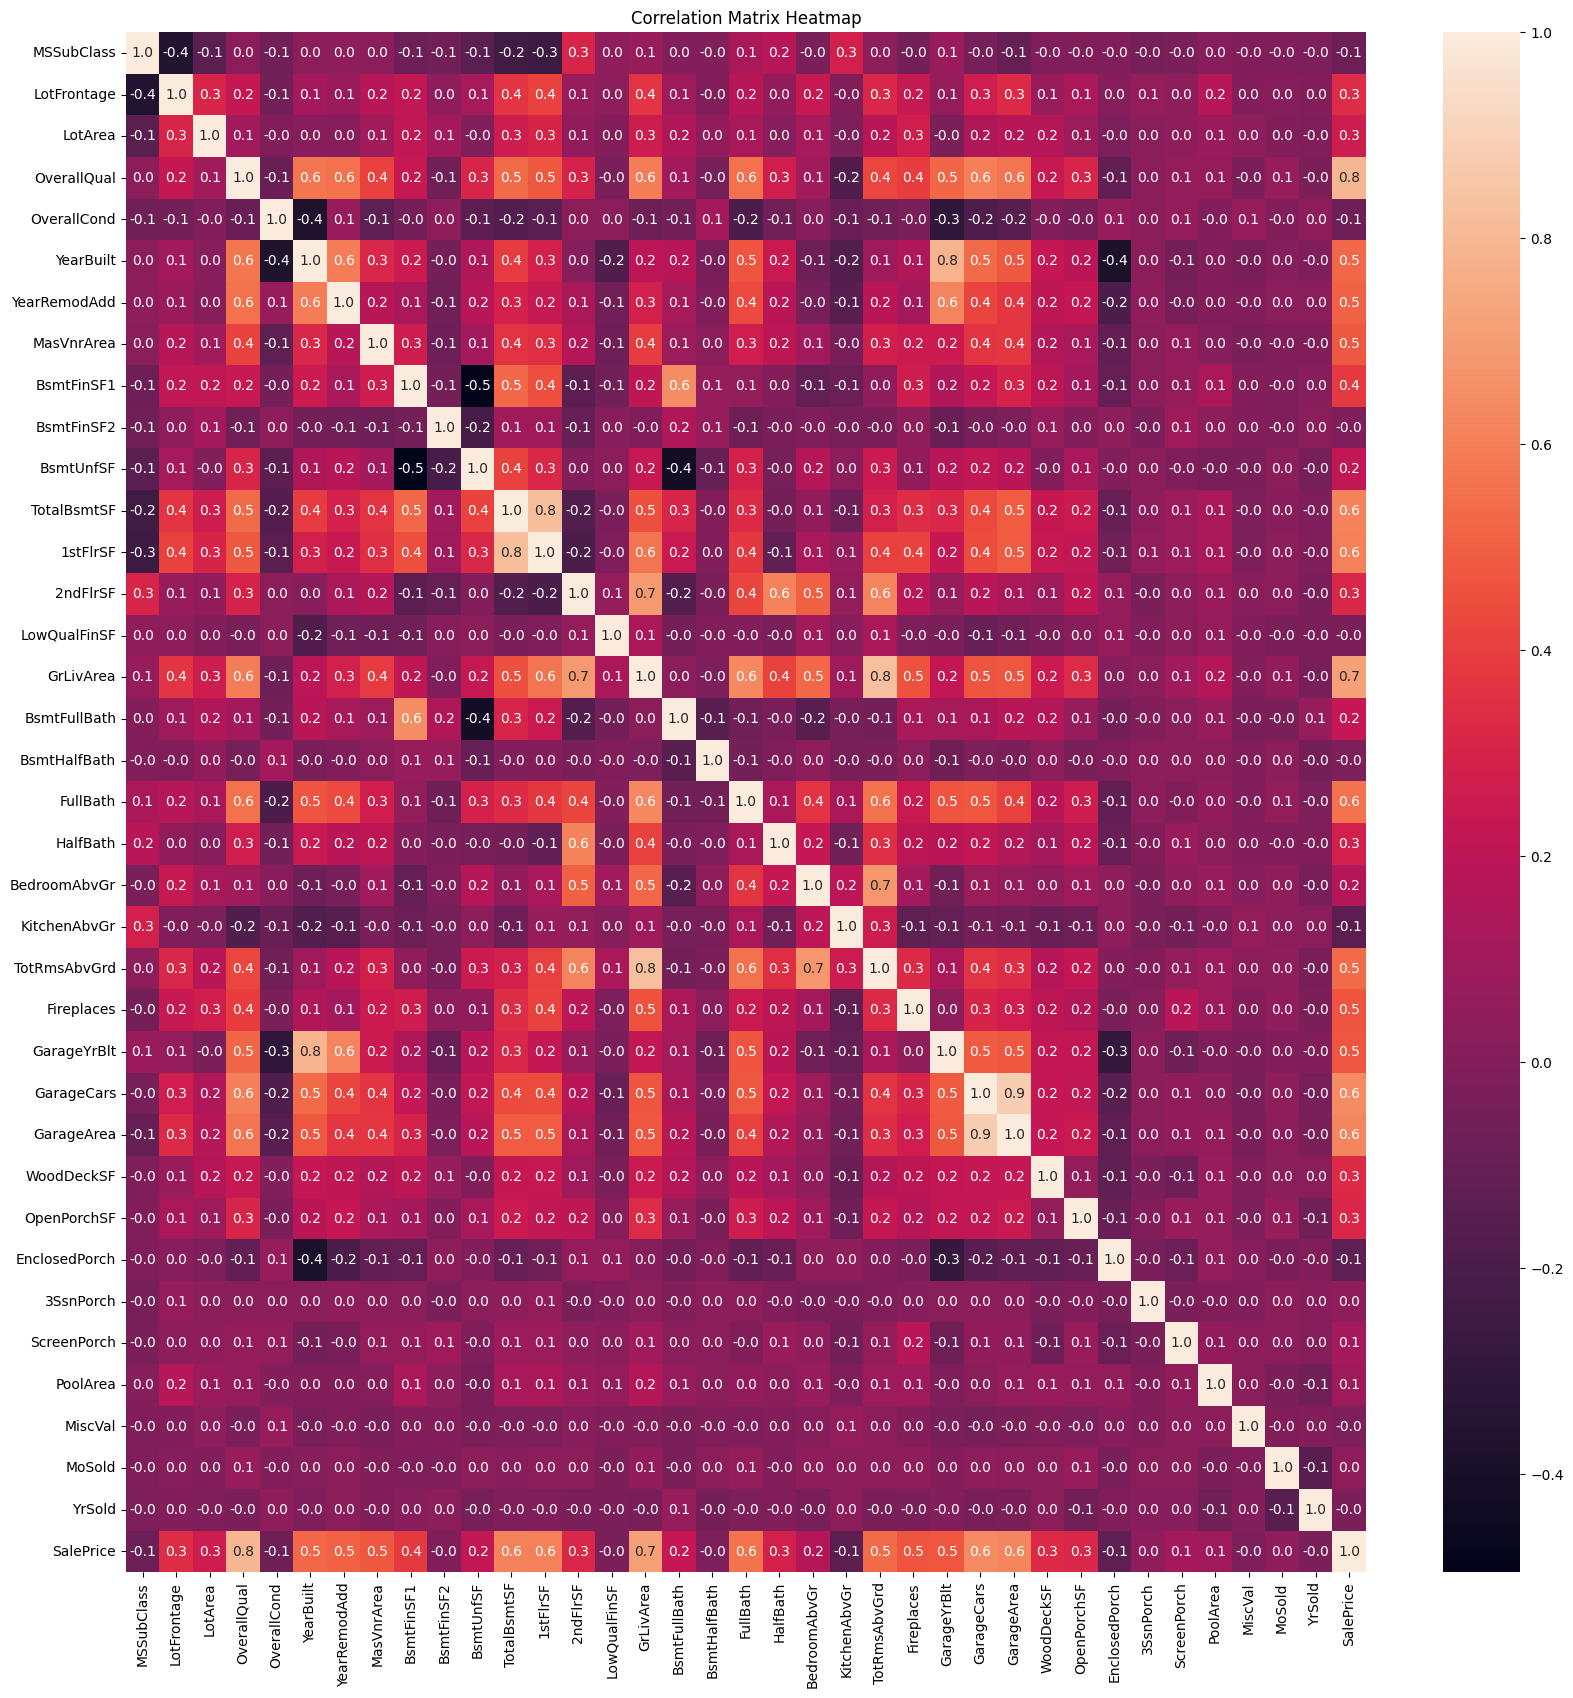

In [29]:
correlation_matrix = df_cleaned[numeric_columns].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [36]:
# Selecting the numeric columns only
df_train = df_cleaned[numeric_columns]
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

# Feature Selection using SelectKBest

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

SelectKBest = SelectKBest(f_regression, k=5)
bestFeature = SelectKBest.fit_transform(X, y)
SelectKBest.get_support()
X.columns[SelectKBest.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

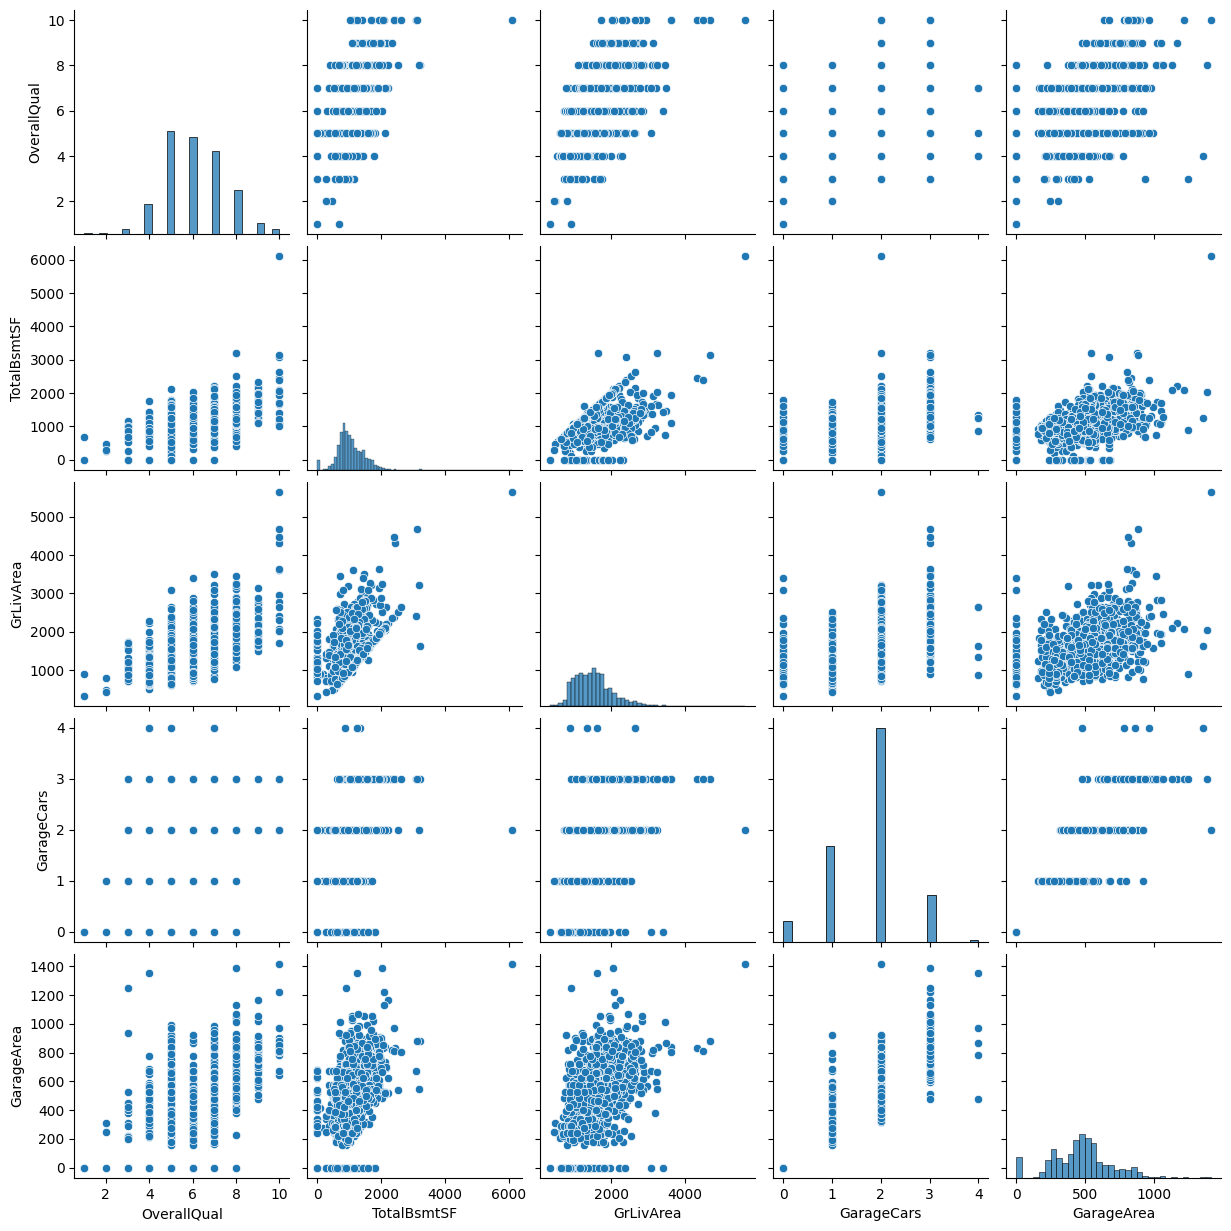

In [39]:
sns.pairplot(df_train[['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'GarageArea']])

In [40]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


# Model Training

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

# Cleaning the Test Data

In [43]:
missing_value = df_test.isnull().sum().sort_values(ascending=False)
missing_value[missing_value > 0]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType2      42
BsmtFinType1      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Functional         2
Utilities          2
BsmtFullBath       2
KitchenQual        1
BsmtFinSF1         1
SaleType           1
TotalBsmtSF        1
GarageCars         1
Exterior2nd        1
Exterior1st        1
GarageArea         1
BsmtUnfSF          1
BsmtFinSF2         1
dtype: int64

In [47]:
df_test = df_test[X.columns]

# Numerical Data
fillWithNumber = ['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'GarageArea']
for col in fillWithNumber:
    df_test[col].fillna(df_test[col].mean(), inplace=True)

df_test.fillna(0, inplace=True)

C:\Users\daksh\AppData\Local\Temp\ipykernel_34752\4277426883.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[col].fillna(df_test[col].mean(), inplace=True)


In [48]:
df_test.isnull().sum().sum()

0

# Prediction

In [49]:
y_pred = model.predict(df_test)
y_pred = y_pred.flatten()

In [51]:
output = pd.read_csv('sample_submission.csv')
output['SalePrice'] = y_pred
output.to_csv('submission.csv', index=False)
output.head()

,Id,SalePrice
0,1461,116736.318839
1,1462,151922.627437
2,1463,172780.631631
3,1464,199311.405414
4,1465,195766.224156


# RMSE --> 0.22087